# 2.1 Data Analysis: Graph

In this notebook we visualize the graph of a webcrawl:
- Subgraph
- Community Subgraph
- Netrgraph Community Subgraph
- Domain Neighbors Subgraph

### Dataset Configuration

In [1]:
data_name = 'chrome-run-01'

### Visualization Configuration

We can also specify what kind of subgraph, what metric and what community we want to visualize (look in the ```dictionary``` for help):

In [2]:
subgraph = 'first'
metric = 'betweenesscentrality'
community = 'modularity_class'

### Set Up

In [3]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
import networkx as nx
import os

In [5]:
import sys
references_path = os.path.join( '..', 'references')
visualization_path = os.path.join('..', 'src', 'visualization')
data_path = os.path.join('..', 'src', 'data')
sys.path.append(references_path)
sys.path.append(visualization_path)
sys.path.append(data_path)
import visualize
import preprocess

For this analysis, we import the graph data with the centrality metrics from the ```interim``` gexf file and calculate the labels:

In [6]:
formatted_data_name = formatted_string = f"{data_name.split('-')[0].capitalize()} (Run {data_name.split('-')[2].zfill(2)})"

gexf_file_path= os.path.join('..', 'data', 'interim', f"{data_name}-centrality-graph.gexf")

G = nx.read_gexf(gexf_file_path)

labels = preprocess.generate_labels(G)


Generating binary labels for the nodes in the graph...
Successfully generated the binary labels for the nodes in the graph


### Subgraph

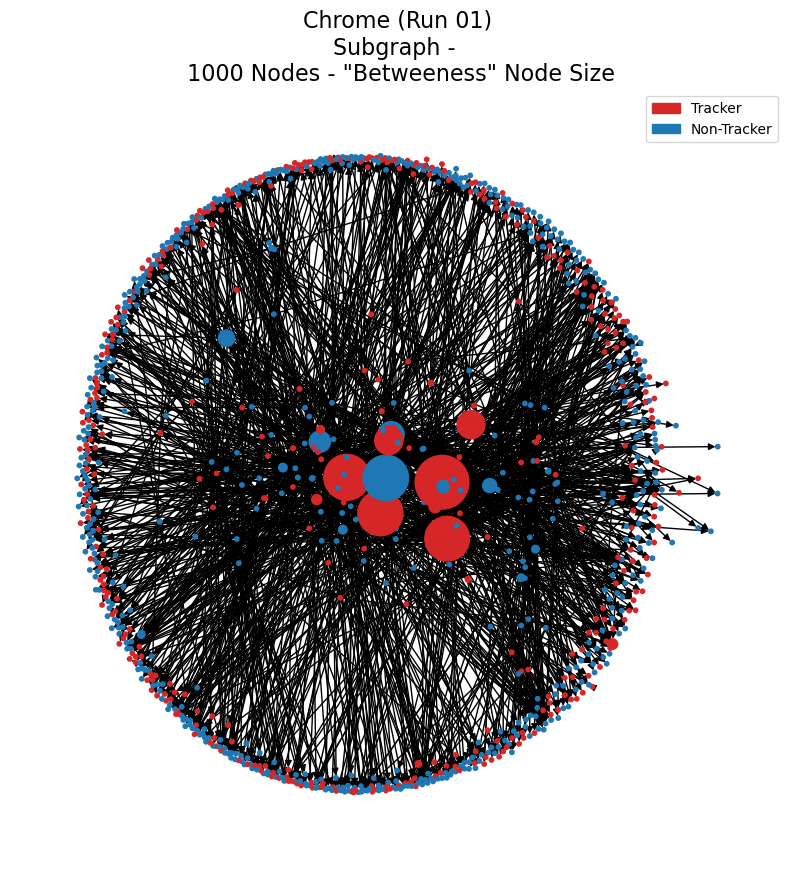

In [7]:
fig = visualize.draw_graph(graph=G, data_name=formatted_data_name, subgraph_criterion=subgraph, nodes_amount=1000, labels=labels, size_attr=metric, community_attr=community, seed=42)
visualize.save_report_figure(fig=fig, data_name=data_name, file_name='subgraph')

### Community Subgraph

We can also draw the subgraph with a different function where the communities are colored and the labels are represented with different shapes:

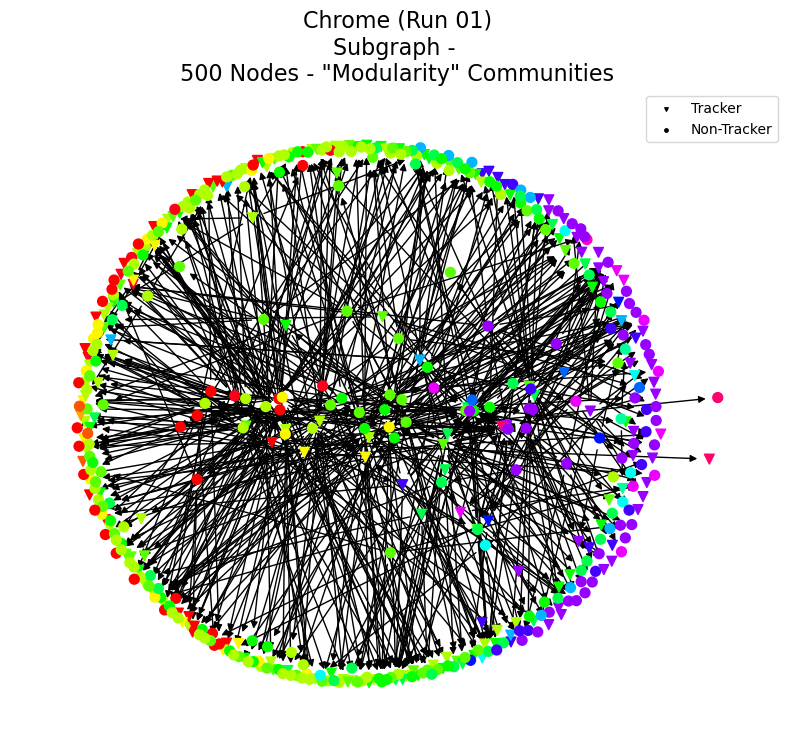

In [8]:
if community != None: 
    fig = visualize.draw_graph_communities(graph=G, data_name=formatted_data_name, subgraph_criterion=subgraph, community_attr=community, nodes_amount=500, labels=labels, size_attr=None, seed=42)
    visualize.save_report_figure(fig, data_name, 'community_subgraph')

### Netrgraph Community Subgraph

We can also use another function that uses the ```netgraph``` library to visualize the communities. If we do not specify a community metric, it will perfrom label propagation:

c:\Users\kaist\anaconda3\envs\thesisenv\lib\site-packages\netgraph\_node_layout.py:1621: UserWarning: There are no connections within community 12.0. The placement of of nodes within this community is arbitrary.
  warnings.warn(f"There are no connections within community {community}. The placement of of nodes within this community is arbitrary.")
c:\Users\kaist\anaconda3\envs\thesisenv\lib\site-packages\netgraph\_node_layout.py:1621: UserWarning: There are no connections within community 55.0. The placement of of nodes within this community is arbitrary.
  warnings.warn(f"There are no connections within community {community}. The placement of of nodes within this community is arbitrary.")
c:\Users\kaist\anaconda3\envs\thesisenv\lib\site-packages\netgraph\_node_layout.py:1621: UserWarning: There are no connections within community 14.0. The placement of of nodes within this community is arbitrary.
  warnings.warn(f"There are no connections within community {community}. The placement of 

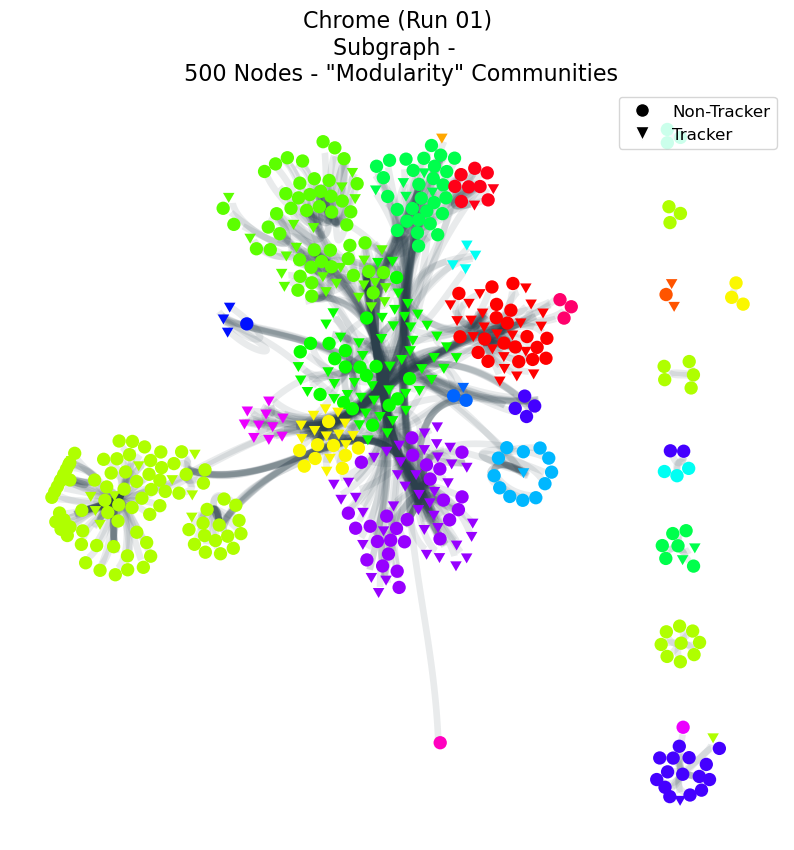

In [9]:
fig = visualize.draw_graph_netgraph_communities(graph=G, data_name=formatted_data_name, subgraph_criterion=subgraph, community_attr=community, nodes_amount=500, labels=labels, size_attr=None, seed=42)
visualize.save_report_figure(fig, data_name, 'netgraph')

### Domain Neighbors Subgraph

We can also visualize the neighbors of specific nodes (domains):

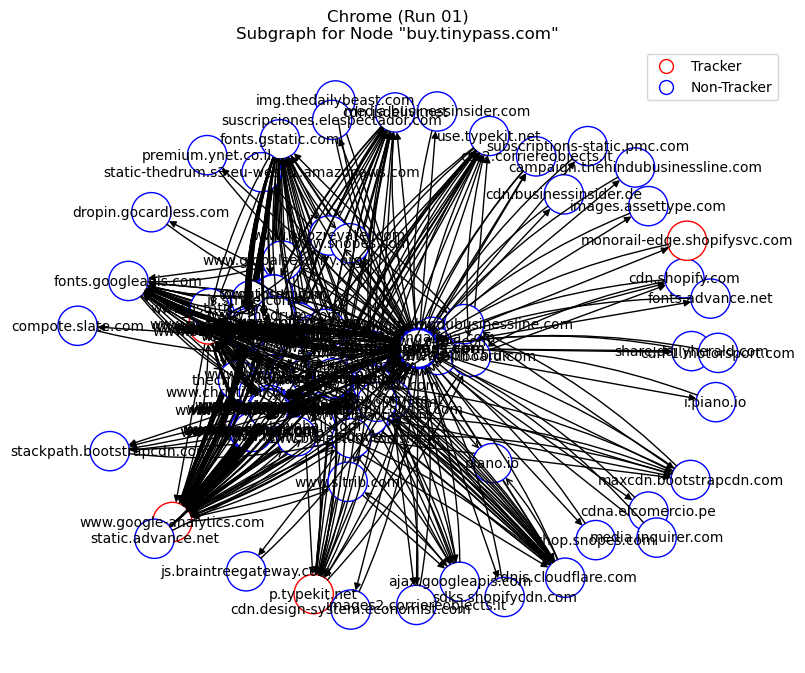

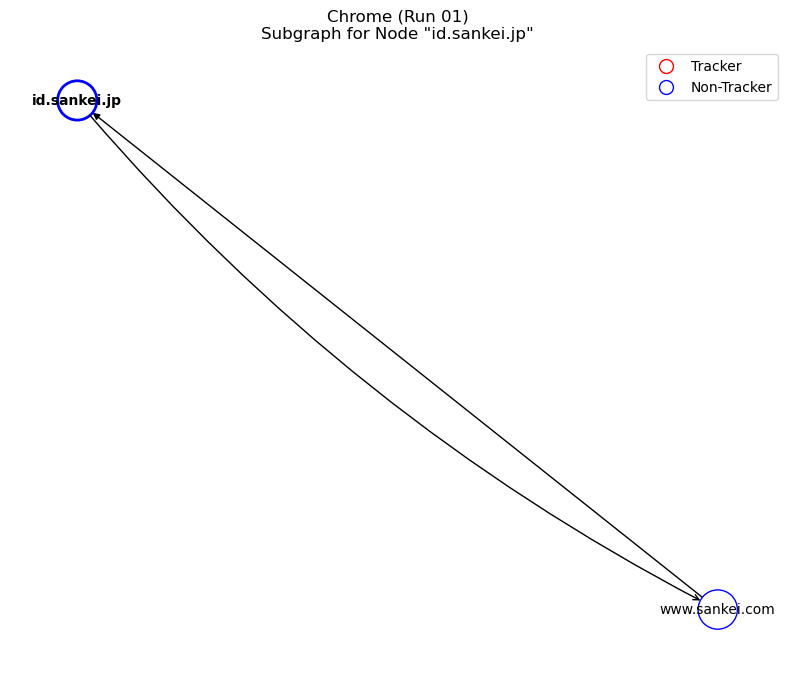

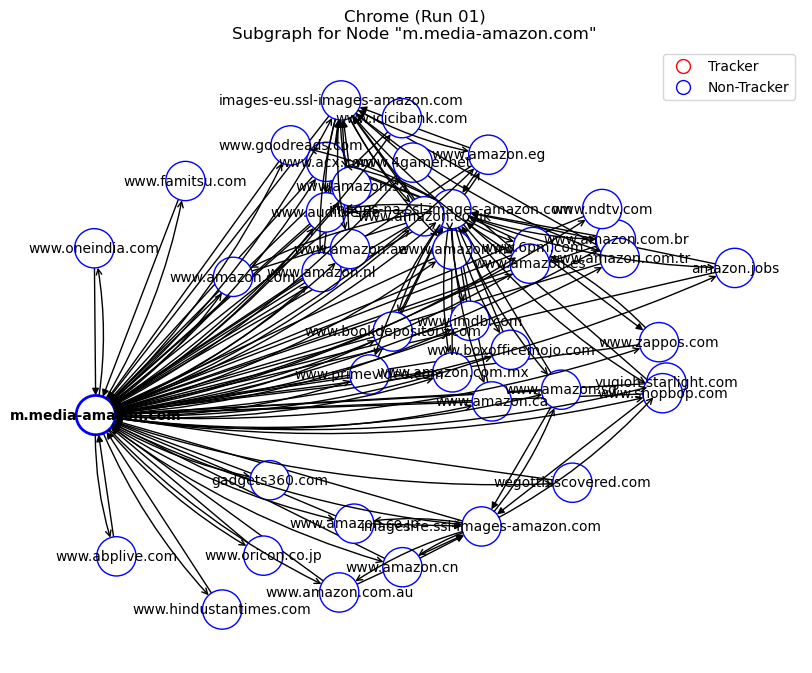

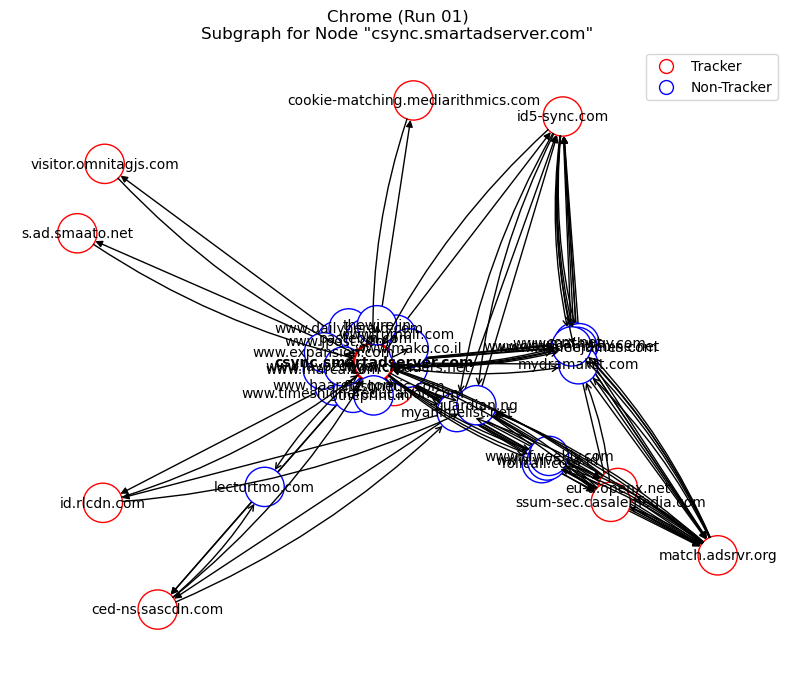

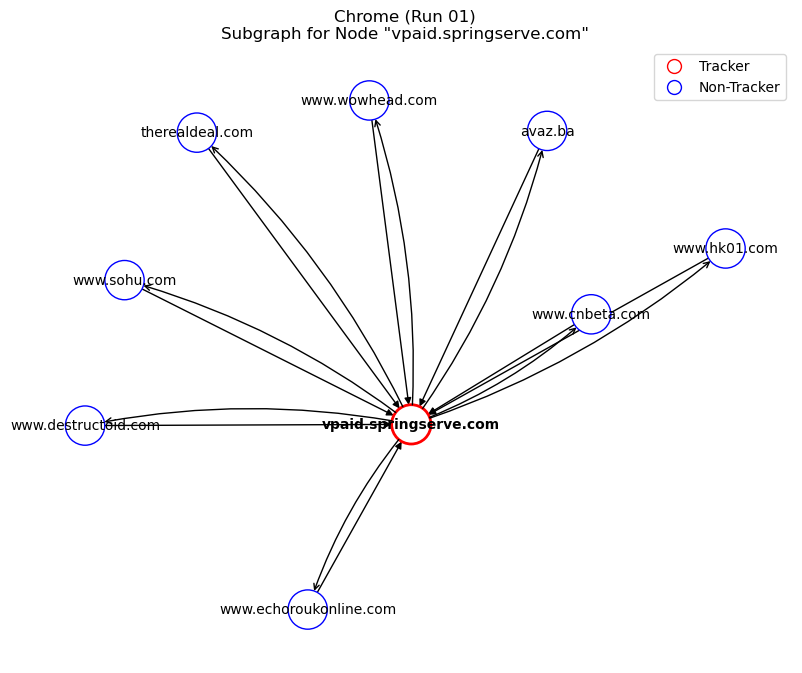

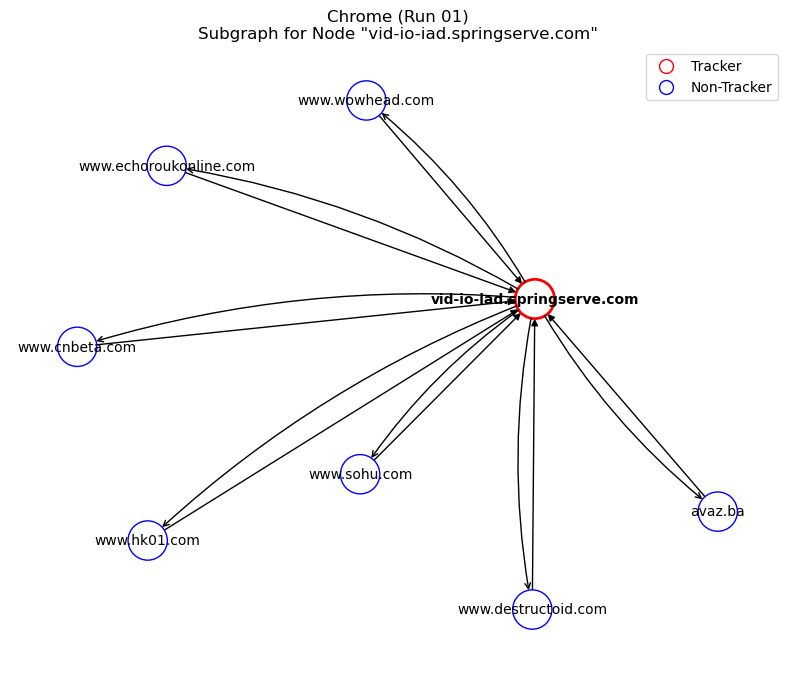

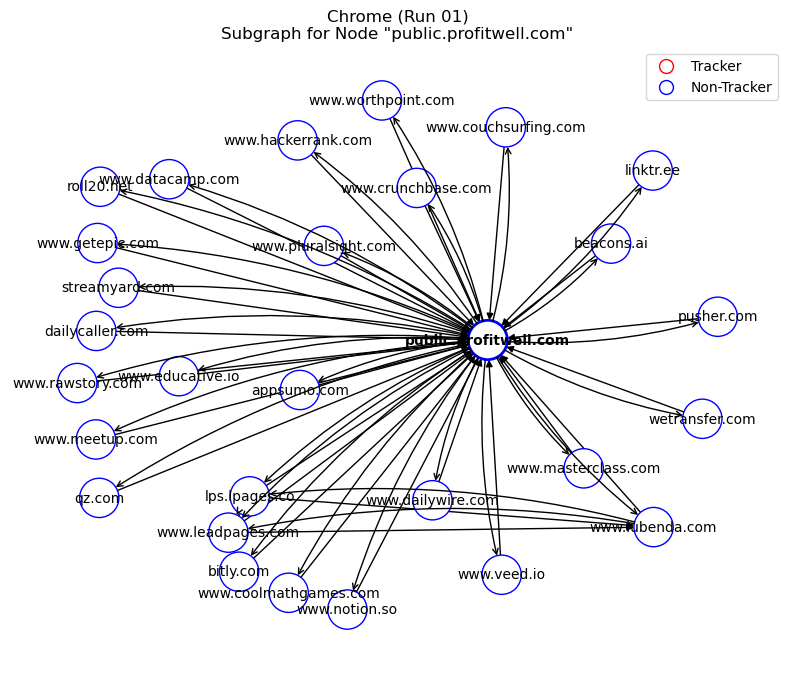

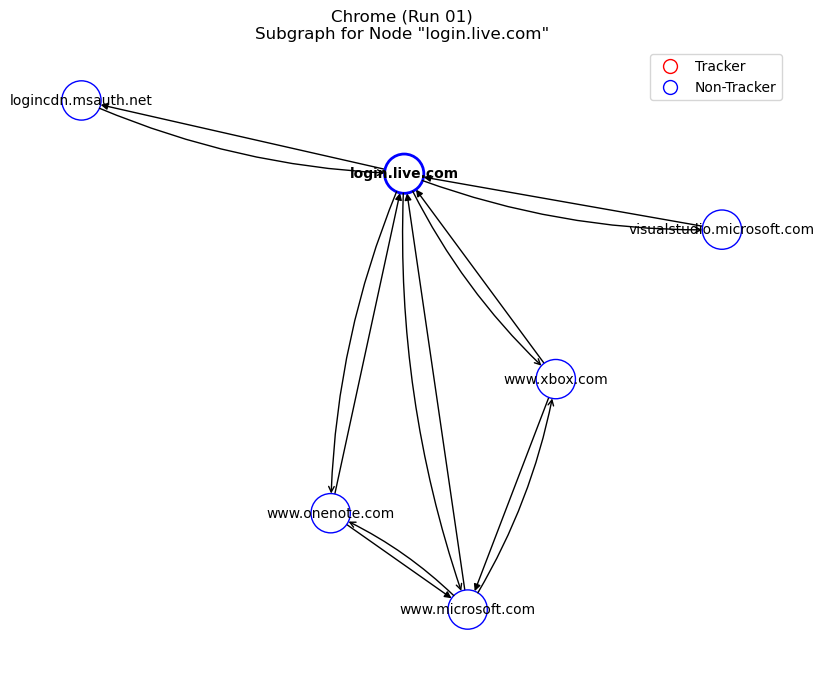

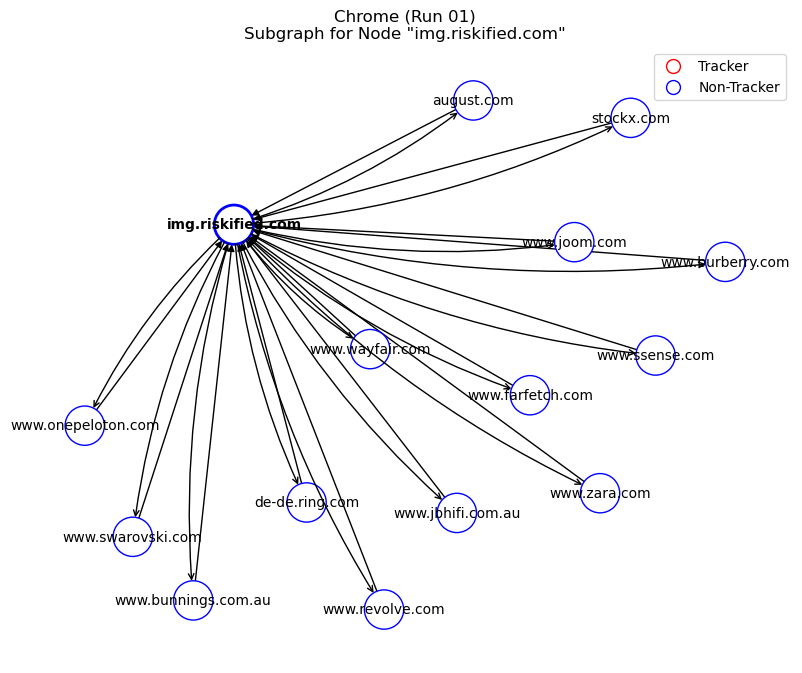

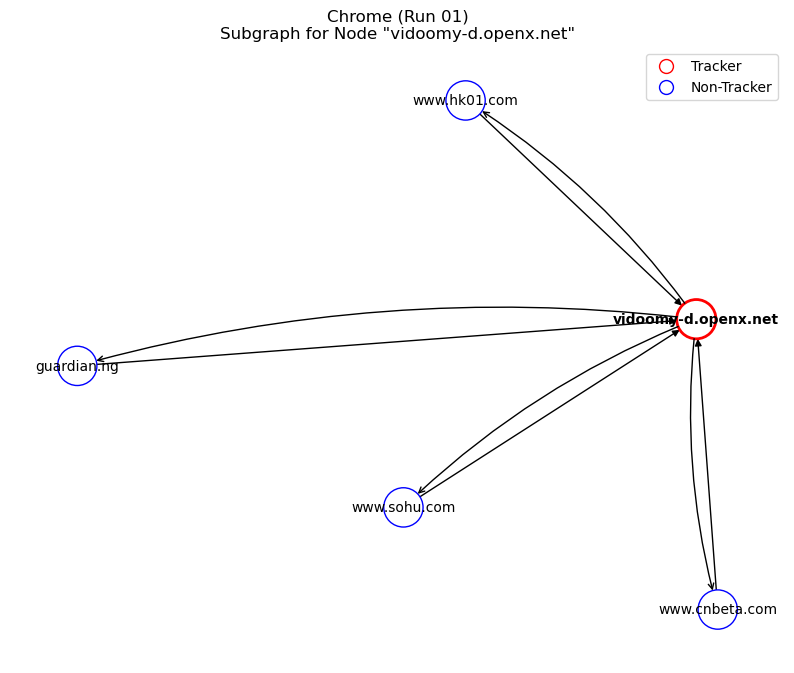

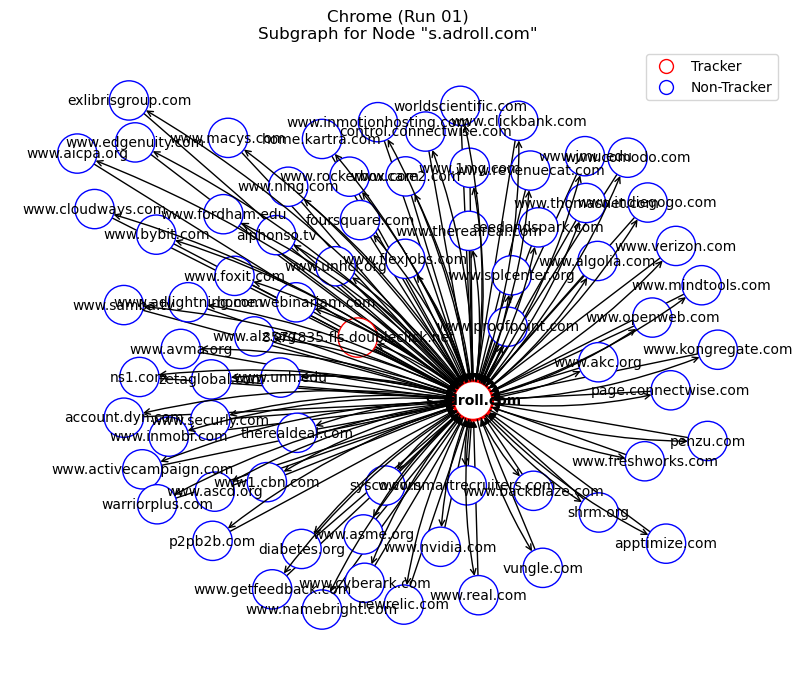

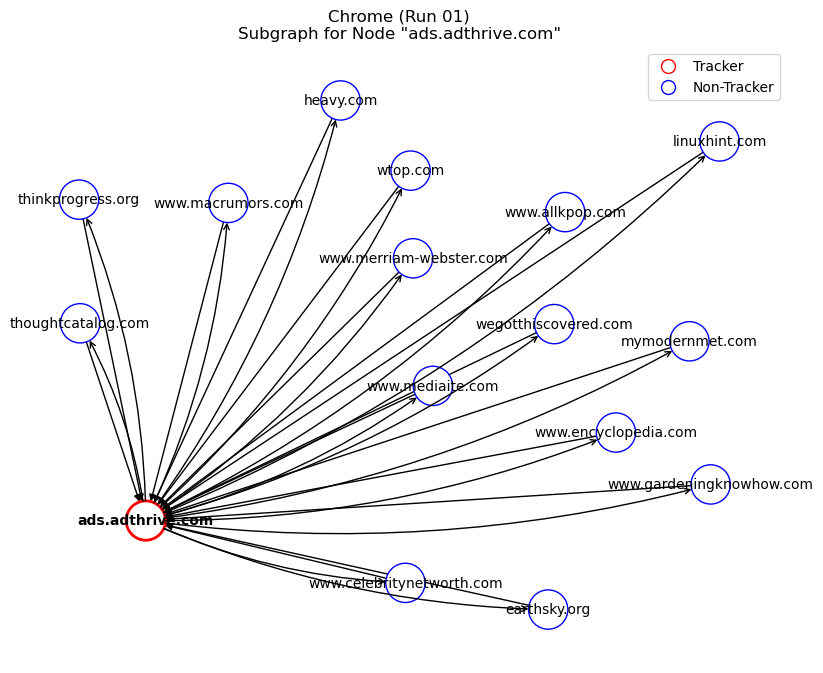

In [11]:
domain_names = ["buy.tinypass.com", "id.sankei.jp", "m.media-amazon.com", "csync.smartadserver.com", "vpaid.springserve.com", "vid-io-iad.springserve.com",  "public.profitwell.com", "login.live.com", "img.riskified.com", "vidoomy-d.openx.net", "s.adroll.com", "ads.adthrive.com"]
figs = visualize.draw_domain_neighbors(G, data_name=formatted_data_name, labels=labels, domain_names=domain_names, depth=1)

folder = os.path.join('..', 'reports', 'figures', data_name,'domain_subgraphs')
if not os.path.exists(folder):
    os.makedirs(folder)

for fig, domain_name in figs:
    fig.savefig(os.path.join('..', 'reports', 'figures', data_name, 'domain_subgraphs', f"{domain_name}.png"))